# Imports and Dataset Loading

In [1]:
# Imports
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import CategoricalNB

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
base_dir = Path(globals()["_dh"][0]).parent

DATASET_NAME = "healthcare-dataset-stroke-data.csv"
dataset_path = base_dir / "datasets" / DATASET_NAME

df = pd.read_csv(dataset_path)

# Initial analysis and data cleaning

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [5]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### Converting data that is not numerical to numerical and dropping NaN values

The algorithm needs numerical data to work, so we need to convert the data that is not numerical to numerical. We will use the `LabelEncoder` from `sklearn` to do this.

In [6]:
def string_convertor(df: pd.DataFrame, column: str) -> pd.DataFrame:
    unique_vals = df[column].unique()
    
    label_encoder = LabelEncoder()
    label_encoder.fit(unique_vals)
    
    df[column] = label_encoder.transform(df[column])
    return df

string_convertor(df, "gender")
string_convertor(df, "ever_married")
string_convertor(df, "work_type")
string_convertor(df, "Residence_type")
string_convertor(df, "smoking_status")

df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,NaN,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.0,2,1


Note that there are some NaN values in the dataset. We will drop them using the `dropna()` method from `pandas`.


In [7]:
df = df.dropna()

### Analyzing and correcting the balance of the dataset

Let's analyze the balance of the dataset. We will plot the number of samples for each class using `countplot` from `seaborn`.

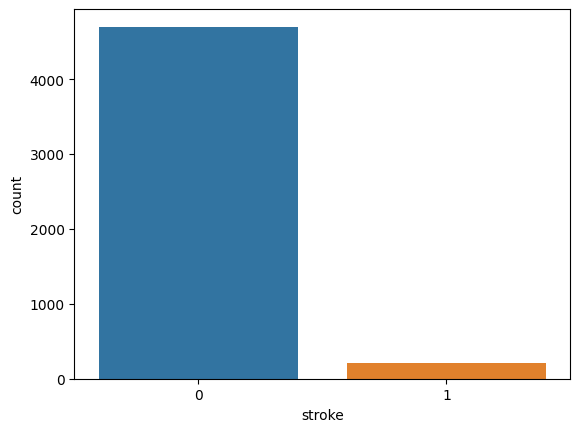

In [8]:
sns.countplot(x="stroke", data=df)
plt.show()


Note that the dataset is not balanced, so we will have to correct this by means of undersampling.

In [9]:
minority_data = df[df["stroke"] == 1]
majority_data = df[df["stroke"] == 0].sample(n=len(minority_data))

df = pd.concat([minority_data, majority_data])

# Classification algorithm

Lets split the dataset into training and testing sets using `train_test_split` from `sklearn`.

In [10]:
X = df.copy().drop("stroke", axis=1)
Y = df["stroke"]

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

## Naive Bayers
Naive Bayes methods are a set of supervised learning algorithms that use Bayes' theorem to calculate the probability of a particular class given a set of features or attributes.
They assume that all features are conditionally independent of each other.

Despite this simplifying assumption, Naive Bayes algorithms are often able to provide highly accurate predictions, particularly in problems with high-dimensional feature spaces and large datasets.

However, they can struggle with strongly correlated features and missing data, and are not ideal for rare or unseen events.

 ### Gaussian
Gaussian Naive Bayes is a variant of the Naive Bayes algorithm used for classification problems where the features are continuous and normally distributed. It works well for problems with a moderate number of features and is commonly used in applications such as medical diagnosis, face recognition, and fraud detection.

In [14]:
GausNB = GaussianNB()
GausNB.fit(X_train, Y_train)
print(GausNB)

Y_expect = Y_test
Y_pred = GausNB.predict(X_test)
accuracy = accuracy_score(Y_expect, Y_pred)
print("Accuracy:", accuracy)

print(classification_report(Y_test, Y_pred))

GaussianNB()
Accuracy: 0.7857142857142857
              precision    recall  f1-score   support

           0       0.80      0.76      0.78        42
           1       0.77      0.81      0.79        42

    accuracy                           0.79        84
   macro avg       0.79      0.79      0.79        84
weighted avg       0.79      0.79      0.79        84



### Bernoulli
Bernoulli Naive Bayes is a variant of the Naive Bayes algorithm used for classification problems where the features are binary. It works well for problems with a small number of features, and is commonly used in text classification tasks such as sentiment analysis and spam detection.

In [12]:
BernNB = BernoulliNB(binarize=True)
BernNB.fit(X_train, Y_train)
print(BernNB)

Y_expect = Y_test
Y_pred = BernNB.predict(X_test)
accuracy = accuracy_score(Y_expect, Y_pred)
print("Accuracy:", accuracy)

print(classification_report(Y_test, Y_pred))

BernoulliNB(binarize=True)
Accuracy: 0.5238095238095238
              precision    recall  f1-score   support

           0       0.53      0.45      0.49        42
           1       0.52      0.60      0.56        42

    accuracy                           0.52        84
   macro avg       0.52      0.52      0.52        84
weighted avg       0.52      0.52      0.52        84



### Multinomial
Multinomial Naive Bayes is a variant of the Naive Bayes algorithm that is commonly used for classification problems in natural language processing. It assumes that the features represent discrete counts, such as word frequencies in a document, and are independent of each other, given the category or label. This algorithm works well for problems where the features follow a multinomial distribution. It is widely used for tasks such as text classification, sentiment analysis, and spam filtering.

In [13]:
MultiNB = MultinomialNB()
MultiNB.fit(X_train, Y_train)
print(MultiNB)

Y_expect = Y_test
Y_pred = MultiNB.predict(X_test)
accuracy = accuracy_score(Y_expect, Y_pred)
print("Accuracy:", accuracy)

print(classification_report(Y_test, Y_pred))

MultinomialNB()
Accuracy: 0.5952380952380952
              precision    recall  f1-score   support

           0       0.60      0.57      0.59        42
           1       0.59      0.62      0.60        42

    accuracy                           0.60        84
   macro avg       0.60      0.60      0.60        84
weighted avg       0.60      0.60      0.60        84



### Complement
Complement Naive Bayes is a variant of the Naive Bayes algorithm that is used for imbalanced datasets, where the minority class is more important than the majority class. It works by emphasizing the importance of the features that are important for the minority class, and it is commonly used in text classification problems.

In [15]:
CompNB = ComplementNB()
CompNB.fit(X_train, Y_train)
print(CompNB)

Y_expect = Y_test
Y_pred = CompNB.predict(X_test)
accuracy = accuracy_score(Y_expect, Y_pred)
print("Accuracy:", accuracy)

print(classification_report(Y_test, Y_pred))

ComplementNB()
Accuracy: 0.5952380952380952
              precision    recall  f1-score   support

           0       0.60      0.57      0.59        42
           1       0.59      0.62      0.60        42

    accuracy                           0.60        84
   macro avg       0.60      0.60      0.60        84
weighted avg       0.60      0.60      0.60        84



### Categorical
Categorical Naive Bayes is a variant of the Naive Bayes algorithm used for classification problems where the features are categorical. It can handle more than two categories and assumes that the categories are independent of each other, given the class variable. It works well for problems where the features are categorical and the number of categories is small, such as in recommendation systems.

In [16]:
CateNB = CategoricalNB()
CateNB.fit(X_train, Y_train)
print(CateNB)

Y_expect = Y_test
Y_pred = CateNB.predict(X_test)
accuracy = accuracy_score(Y_expect, Y_pred)
print("Accuracy:", accuracy)

print(classification_report(Y_test, Y_pred))

CategoricalNB()
Accuracy: 0.7023809523809523
              precision    recall  f1-score   support

           0       0.76      0.60      0.67        42
           1       0.67      0.81      0.73        42

    accuracy                           0.70        84
   macro avg       0.71      0.70      0.70        84
weighted avg       0.71      0.70      0.70        84

